# Machine Learning - FYP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from google.colab import drive, files
import xlrd

### 1) Simple Neural Networks to predict next timestep

#### a) Architecture 1 - Next timestep prediction for 1 parameter using 6 inputs

- Voltage prediction - Reading the file and extracting the data

In [2]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:, 1:7]  # Input features
y = data.iloc[:, 12]   # Target labels

Mounted at /content/gdrive


Scaling and training dataset

In [3]:
X_numpy = X.values
y_numpy = y.values

# Arrays
y_2d = y_numpy.reshape(-1, 1)

# Create a StandardScaler object
scaler = StandardScaler()
6
# Fit and transform your input features
X_scaled = scaler.fit_transform(X_numpy)
y_scaled = scaler.fit_transform(y_2d)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Defining model

In [6]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim = 6))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer with a single neuron for voltage prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
93/93 [==============================] - 1s 2ms/step - loss: 0.2799
Epoch 2/10
93/93 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 3/10
93/93 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 4/10
93/93 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 5/10
93/93 [==============================] - 0s 2ms/step - loss: 2.1051e-04
Epoch 6/10
93/93 [==============================] - 0s 2ms/step - loss: 8.4869e-05
Epoch 7/10
93/93 [==============================] - 0s 2ms/step - loss: 5.3603e-05
Epoch 8/10
93/93 [==============================] - 0s 2ms/step - loss: 4.7636e-05
Epoch 9/10
93/93 [==============================] - 0s 2ms/step - loss: 4.7809e-05
Epoch 10/10
93/93 [==============================] - 0s 2ms/step - loss: 2.9975e-05


Evaluating model

In [7]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# Make predictions on the test set
predictions = model.predict(X_test)


#Display input values, original output values, and predicted output values
for i in range(len(X_test)):
    print(f"Input: {X_test[i]}, Original Output: {y_test[i]}, Predicted Output: {predictions[i][0]}, Error: {(y_test[i] - predictions[i][0])/y_test[i] }")

24/24 [==============================] - 0s 2ms/step - loss: 2.5628e-05
Mean Squared Error on Test Set: 2.5628247385611758e-05
24/24 [==============================] - 0s 1ms/step
Input: [-0.55088778  0.91671032 -0.70747494 -0.17179335  0.13556223 -0.70244381], Original Output: [0.13573635], Predicted Output: 0.1405017375946045, Error: [-0.03510768]
Input: [-0.82075069  1.09047524 -0.33421289  0.163088   -1.04854068 -0.33711729], Original Output: [-1.04772268], Predicted Output: -1.039649248123169, Error: [0.00770569]
Input: [-0.82037256  0.76624702  0.5123835  -0.11153386 -0.88845513  0.51384161], Original Output: [-0.88832071], Predicted Output: -0.8868690133094788, Error: [0.0016342]
Input: [-0.2401771   0.55257614 -0.70825065 -0.20753354  0.3201923  -0.70244529], Original Output: [0.32101191], Predicted Output: 0.32605087757110596, Error: [-0.01569713]
Input: [ 0.28371283 -0.06169051 -0.70877612 -0.23177703  0.52763849 -0.70244558], Original Output: [0.52881806], Predicted Output: 

Assesing model features

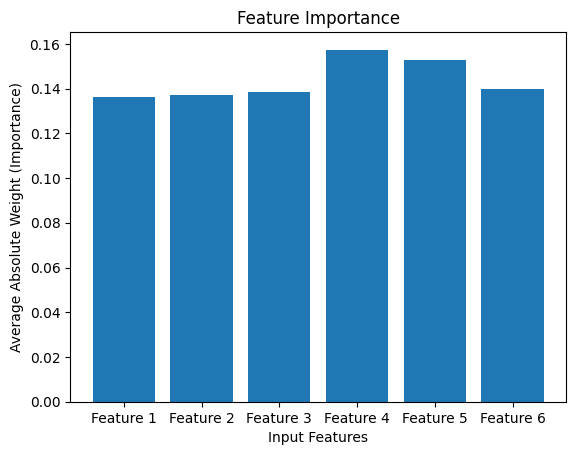

In [8]:
# Get the learned weights of the first dense layer
weights = model.layers[0].get_weights()[0]

# Compute the feature importance as the average absolute weight for each feature
feature_importance = np.mean(np.abs(weights), axis=1)

# Plot the importance of each input feature
plt.bar(range(len(feature_importance)), feature_importance)
plt.xlabel('Input Features')
plt.ylabel('Average Absolute Weight (Importance)')
plt.xticks(range(len(feature_importance)), ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6'])
plt.title('Feature Importance')
plt.show()